# Neural Networks

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [5]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/Data_for_Classification.csv','rU'), encoding='utf-8')

In [6]:
df.shape

(8006399, 22)

In [7]:
df.dtypes

FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
ArrTime                int64
DepTime                int64
CRSArrTime             int64
CRSDepTime             int64
CRSElapsedTime         int64
ActualElapsedTime      int64
ArrDelayMinutes        int64
DepDelayMinutes        int64
OriginCityName        object
DestCityName          object
Flight_Status          int64
OriginVisibility     float64
OriginWind           float64
OriginPrecip         float64
dtype: object

In [14]:
cols = df.columns.tolist()
cols.remove('OriginWind')
cols.remove('OriginVisibility')
cols.remove('ArrTime')
cols.remove('ArrDelayMinutes')
cols.remove('DepTime')
cols.remove('OriginCityName')
cols.remove('DestCityName')
cols.remove('ActualElapsedTime')
cols.remove('FlightNum')
cols.remove('DepDelayMinutes')

In [15]:
len(cols)

12

In [16]:
cols

['Year',
 'Day',
 'Month',
 'Week',
 'Origin',
 'Dest',
 'UniqueCarrier',
 'CRSArrTime',
 'CRSDepTime',
 'CRSElapsedTime',
 'Flight_Status',
 'OriginPrecip']

In [17]:
data = df[cols]
data.shape

(8006399, 12)

In [18]:
data['Dep_hour'] = data['CRSDepTime'].apply(lambda x: str(x)[:-2])
data['Dep_min'] = data['CRSDepTime'].apply(lambda x: str(x)[2:4])
data['Arr_hour'] = data['CRSArrTime'].apply(lambda x: str(x)[:-2])
data['Arr_min'] = data['CRSArrTime'].apply(lambda x: str(x)[2:4])
data = data.replace('', 0)

In [19]:
del data['CRSArrTime']
del data['CRSDepTime']

In [20]:
c = df.columns.tolist()
c.remove('Flight_Status')

In [21]:
len(c)

21

In [22]:
data[['Dep_hour','Dep_min','Arr_hour','Arr_min']] = data[['Dep_hour','Dep_min','Arr_hour','Arr_min']].astype(int)

In [14]:
data.to_csv(cur_path+'/Class.csv',index = False)

### Cross Validation for splitting the data in train and test sets

In [26]:
X= df[c]
y = df['Flight_Status']

In [27]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.40,random_state=0)

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])

In [29]:
# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [30]:
X_train.head()

,FlightNum,Year,Day,Month,Week,ArrTime,DepTime,CRSArrTime,CRSDepTime,CRSElapsedTime,ActualElapsedTime,ArrDelayMinutes,DepDelayMinutes,OriginVisibility,OriginWind,OriginPrecip,carrier,origin,dest
2055254,366,2016,26,6,7,1507,1335,1505,1335,150,152,2,0,15.0,4.0,0.0,11,63,227
6803504,105,2017,27,6,2,1236,1115,1250,1115,215,201,0,0,10.0,7.0,0.0,11,156,195
3350762,558,2016,21,9,3,1640,1516,1640,1520,140,144,0,0,10.0,2.0,0.0,11,132,156
6875504,3409,2017,21,7,5,2343,2020,2305,1930,155,143,38,50,6.0,5.0,0.0,11,60,69
7911042,31,2017,25,9,1,1328,1048,1325,1045,100,100,3,3,10.0,8.0,0.0,11,1,60


In [36]:
# Creating the model
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=20,verbose=False)
model1 = model1.fit(X_train, y_train)

In [37]:
# Caluculating the accuracy of the model

accuracy = model1.score(X_train, y_train)
print(accuracy)

0.999937549947


In [38]:
# Run the model on the test set
y_pred = model1.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [39]:
# Generating Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2491881      53]
 [    187  710439]]


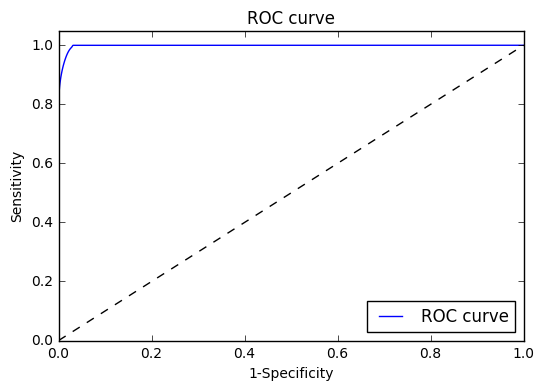

In [40]:
# ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# TRIALS

# 1

In [14]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False)
model2= model2.fit(X_train, y_train)

accuracy = model2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model2.predict(X_test)
y_train_predicted= model2.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999990186421
[[1868957      19]
 [      9  532935]]
MAE_train: 9.81357946029e-06
MAE_test: 1.1657340794e-05
RMS_train: 9.81357946029e-06
RMS_test: 1.1657340794e-05


# 2

In [16]:
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes=(25,13,6),max_iter=25,verbose=False)
model1= model1.fit(X_train, y_train)

accuracy = model1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model1.predict(X_test)
y_train_predicted= model1.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999977339553
[[1868965      11]
 [     45  532899]]
MAE_train: 2.26604471174e-05
MAE_test: 2.33146815881e-05
RMS_train: 2.26604471174e-05
RMS_test: 2.33146815881e-05


# 3

In [17]:
from sklearn.neural_network import MLPClassifier

model3 = MLPClassifier(hidden_layer_sizes=(20,10,5),max_iter=15,verbose=False)
model3= model3.fit(X_train, y_train)

accuracy = model3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model3.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model3.predict(X_test)
y_train_predicted= model3.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999649209141
[[1868962      14]
 [    832  532112]]
MAE_train: 0.000350790858526
MAE_test: 0.00035221822542
RMS_train: 0.000350790858526
RMS_test: 0.00035221822542


# 4

In [19]:
from sklearn.neural_network import MLPClassifier

model4 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=30,verbose=False)
model4= model4.fit(X_train, y_train)

accuracy = model4.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model4.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model4.predict(X_test)
y_train_predicted= model4.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999999643143
[[1868974       2]
 [      0  532944]]
MAE_train: 3.56857434919e-07
MAE_test: 8.32667199574e-07
RMS_train: 3.56857434919e-07
RMS_test: 8.32667199574e-07


# 5

In [21]:
from sklearn.neural_network import MLPClassifier

model5 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=30,verbose=False)
model5= model5.fit(X_train, y_train)

accuracy = model5.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model5.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model5.predict(X_test)
y_train_predicted= model5.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999998750999
[[1868974       2]
 [      0  532944]]
MAE_train: 1.24900102222e-06
MAE_test: 8.32667199574e-07
RMS_train: 1.24900102222e-06
RMS_test: 8.32667199574e-07


# 6

In [22]:

from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=10,verbose=False, learning_rate='adaptive')
model6= model5.fit(X_train, y_train)

accuracy = model6.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model6.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model6.predict(X_test)
y_train_predicted= model6.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999138367723
[[1868966      10]
 [   2096  530848]]
MAE_train: 0.000861632276613
MAE_test: 0.000876798561151
RMS_train: 0.000861632276613
RMS_test: 0.000876798561151


# 7

In [24]:

from sklearn.neural_network import MLPClassifier

model7 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=20,verbose=False, learning_rate='adaptive')
model7= model7.fit(X_train, y_train)

accuracy = model7.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model7.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model7.predict(X_test)
y_train_predicted= model7.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999915603217
[[1868964      12]
 [    217  532727]]
MAE_train: 8.43967833585e-05
MAE_test: 9.53403943512e-05
RMS_train: 8.43967833585e-05
RMS_test: 9.53403943512e-05


# 8

In [25]:

from sklearn.neural_network import MLPClassifier

model8 = MLPClassifier(hidden_layer_sizes=(15,10,5),max_iter=15,verbose=False, learning_rate='adaptive')
model8= model8.fit(X_train, y_train)

accuracy = model8.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model8.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model8.predict(X_test)
y_train_predicted= model8.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.995803534994
[[1868041     935]
 [   9053  523891]]
MAE_train: 0.00419646500594
MAE_test: 0.00415833999467
RMS_train: 0.00419646500594


# 9

In [27]:
from sklearn.neural_network import MLPClassifier

model9 = MLPClassifier(hidden_layer_sizes=(30,15,5),max_iter=5,verbose=False, learning_rate='adaptive')
model9= model9.fit(X_train, y_train)

accuracy = model9.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model9.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model9.predict(X_test)
y_train_predicted= model9.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.997778740896
[[1868645     331]
 [   5080  527864]]
MAE_train: 0.00222125910366
MAE_test: 0.00225278110845
RMS_train: 0.00222125910366


# 10

In [28]:
from sklearn.neural_network import MLPClassifier

model10 = MLPClassifier(hidden_layer_sizes=(50,25,10),max_iter=5,verbose=False, learning_rate='adaptive')
model10= model10.fit(X_train, y_train)

accuracy = model10.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model10.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model10.predict(X_test)
y_train_predicted= model10.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.997985361351
[[1868418     558]
 [   4333  528611]]
MAE_train: 0.00201463864884
MAE_test: 0.00203628763656
RMS_train: 0.00201463864884


# 11

In [30]:
from sklearn.neural_network import MLPClassifier

model11 = MLPClassifier(hidden_layer_sizes=(20,10,5),max_iter=25,verbose=False, learning_rate='adaptive')
model11= model11.fit(X_train, y_train)

accuracy = model11.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model11.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model11.predict(X_test)
y_train_predicted= model11.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.999931304944
[[1868819     157]
 [      9  532935]]
MAE_train: 6.8695056222e-05
MAE_test: 6.91113775646e-05
RMS_train: 6.8695056222e-05


# 12

In [36]:
from sklearn.neural_network import MLPClassifier

model11 = MLPClassifier(hidden_layer_sizes=(30,15,7),max_iter=7,verbose=False, learning_rate='adaptive')
model11= model11.fit(X_train, y_train)

accuracy = model11.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model11.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model11.predict(X_test)
y_train_predicted= model11.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.998343467787
[[1868203     773]
 [   3223  529721]]
MAE_train: 0.0016565322129
MAE_test: 0.00166366906475
RMS_train: 0.0016565322129


# 13

In [37]:
X= df[cols]
y = df['Flight_Status']

In [44]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [3938005 3938006 3938007 ..., 8006396 8006397 8006398] TEST: [      0       1       2 ..., 4290412 4290413 4290414]
TRAIN: [      0       1       2 ..., 4290412 4290413 4290414] TEST: [3938005 3938006 3938007 ..., 8006396 8006397 8006398]


In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

In [47]:
# Getting only the numerical columns
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

X_train.shape

(4003200, 19)

In [48]:
X_test.shape

(4003199, 19)

In [49]:
from sklearn.neural_network import MLPClassifier

model13 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=7,verbose=False, learning_rate='adaptive')
model13= model13.fit(X_train, y_train)

accuracy = model13.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model13.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model13.predict(X_test)
y_train_predicted= model13.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)

Accuracy:  0.998508693046
[[3109343    6280]
 [    503  887073]]
MAE_train: 0.00149130695444
MAE_test: 0.00169439490767
RMS_train: 0.00149130695444


In [52]:
from sklearn.neural_network import MLPClassifier

model13 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=20,verbose=False, learning_rate='adaptive')
model13= model13.fit(X_train, y_train)

accuracy = model13.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model13.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model13.predict(X_test)
y_train_predicted= model13.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999870853317
[[3115112     511]
 [     62  887514]]
MAE_train: 0.000129146682654
MAE_test: 0.000143135527362
RMS_train: 0.000129146682654
RMS_test: 0.000143135527362


In [53]:
from sklearn.neural_network import MLPClassifier

model13 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=25,verbose=False, learning_rate='adaptive')
model13= model13.fit(X_train, y_train)

accuracy = model13.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model13.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model13.predict(X_test)
y_train_predicted= model13.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999948790967
[[3115492     131]
 [     29  887547]]
MAE_train: 5.12090327738e-05
MAE_test: 3.99680355636e-05
RMS_train: 5.12090327738e-05
RMS_test: 3.99680355636e-05


In [55]:
from sklearn.neural_network import MLPClassifier

model13 = MLPClassifier(hidden_layer_sizes=(15,7,3),max_iter=25,verbose=False, learning_rate='adaptive')
model13= model13.fit(X_train, y_train)

accuracy = model13.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model13.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model13.predict(X_test)
y_train_predicted= model13.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999957284173
[[3115423     200]
 [      9  887567]]
MAE_train: 4.27158273381e-05
MAE_test: 5.22082464549e-05
RMS_train: 4.27158273381e-05
RMS_test: 5.22082464549e-05


In [56]:
from sklearn.neural_network import MLPClassifier

model13 = MLPClassifier(hidden_layer_sizes=(15,7,3),max_iter=22,verbose=False, learning_rate='adaptive')
model13= model13.fit(X_train, y_train)

accuracy = model13.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model13.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model13.predict(X_test)
y_train_predicted= model13.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999618055556
[[3113997    1626]
 [    298  887278]]
MAE_train: 0.000381944444444
MAE_test: 0.000480615627652
RMS_train: 0.000381944444444
RMS_test: 0.000480615627652


In [61]:
from sklearn.neural_network import MLPClassifier

model14 = MLPClassifier(hidden_layer_sizes=(25,12,6),max_iter=22,verbose=False, learning_rate='adaptive')
model14= model14.fit(X_train, y_train)

accuracy = model14.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model14.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model14.predict(X_test)
y_train_predicted= model14.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.991094624301
[[3098242   17381]
 [  18696  868880]]
MAE_train: 0.00890537569944
MAE_test: 0.00901204261892
RMS_train: 0.00890537569944
RMS_test: 0.00901204261892


In [ ]:
from sklearn.neural_network import MLPClassifier

model14 = MLPClassifier(hidden_layer_sizes=(15,7,3),max_iter=22,verbose=False, learning_rate='adaptive')
model14= model14.fit(X_train, y_train)

accuracy = model14.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model14.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model14.predict(X_test)
y_train_predicted= model14.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)